# Sociomepy

Sociomepy is a Python package that provides a number of convient functions, data structures, and models for manipulating socio-environmental data. Implementation-wise it is a wrapper around the GeoPandas library and is fully compatitble with all data formats that geopandas accepts.

## SociomeDataFrame
SociomeDataFrame is a geospatial dataframe that is designed to work with the sociome project. We define our own wrapper data structure here because there is a lot of project-specific functionality that we need such as logging, data provenance, and handling specific data formats. 

Let's see how it works! First, let's run some code to set up the environment (you only need to do this if you are in the wrong working directory).

In [1]:
import sys
import os
parent = os.path.abspath('..')
sys.path.append(parent)

Now, let's import a SociomeDataFrame. A SociomeDataFrame represents social indicators for address points in a city or other region.

In [2]:
from sociomepy.data import SociomeDataFrame

We can initialize this SociomeDataFrame with many different types of data. In this example, we will work with an ArcGIS address file of the City of Chicago. The code below will take a wile to run!

In [3]:
s = SociomeDataFrame.from_arcgis_file('../data/chicago-addresses.csv')

/Users/sanjaykrishnan/Documents/sociomepy/sociomepy/data.py:126: DtypeWarning: Columns (5,6,7,8,12,14,17,20,23,28,38,40,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


There are a couple of things that we can do to help debug SociomeDataFrames since they will generally be slow (there are a lot of addresses even in a small city!). For example, the following code will only return 1000 addresses.

In [4]:
s = SociomeDataFrame.from_arcgis_file('../data/chicago-addresses.csv')

/Users/sanjaykrishnan/Documents/sociomepy/sociomepy/data.py:126: DtypeWarning: Columns (5,6,7,8,12,14,17,20,23,28,38,40,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


## Adding Subdivisions
A subdivision is a partitioning of the world into disjoint units such as zipcodes, census tracts, etc. Every sociome dataframe can be associated with one or more subdivisions over its data. Based on the ArcGIS data used above, we currently have data subdivided by zipcode.

In [5]:
s.subdivisions

['Post_Code']

We can add new subdivisions to the data. Any GeoPandas dataframe with polygonal geometry can be used. For example, we can combine this data with census tracts.

In [6]:
import geopandas as gpd

gdf = gpd.read_file('../data/acs')
s.add_subdivision(gdf, 'tract', 'GEOID')

/Users/sanjaykrishnan/Documents/sociome-data-commons-v2/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3378: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
s.subdivisions

['Post_Code', 'tract']

We can also associate different metrics with these subdivisions. For example, the code below adds and ACS variable to the sociomedataframe

In [8]:
s.merge_on_subdivision(gdf, 'tract', 'GEOID', {'SE_A1006_2': 'income'})

## Plotting
We provide some basic mapping and plotting functionality.

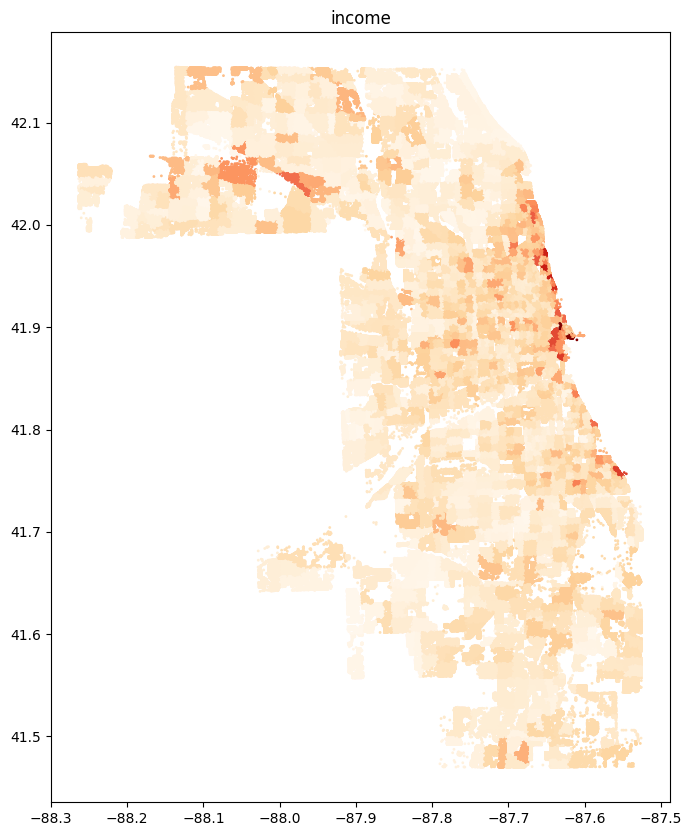

In [9]:
%matplotlib inline
s.to_mpl_inline(['income'])